In [1]:
import pandas as pd
df = pd.read_csv("dataset_tomat.csv")
df

,Harga,Hari,Cuaca,Promo,Total_Penjualan
0,8000,Senin,Cerah,Tidak,92
1,7500,Senin,Berawan,Tidak,88
2,12000,Selasa,Hujan,Ya,105
3,9500,Selasa,Mendung,Tidak,70
4,7000,Rabu,Cerah,Tidak,98
...,...,...,...,...,...
90,7000,Jumat,Mendung,Tidak,80
91,6500,Sabtu,Cerah,Ya,178
92,11200,Sabtu,Cerah,Tidak,130
93,11500,Minggu,Cerah,Tidak,138


In [2]:
df.shape

(95, 5)

In [3]:
df.info

<bound method DataFrame.info of     Harga    Hari    Cuaca  Promo  Total_Penjualan
0    8000   Senin    Cerah  Tidak               92
1    7500   Senin  Berawan  Tidak               88
2   12000  Selasa    Hujan     Ya              105
3    9500  Selasa  Mendung  Tidak               70
4    7000    Rabu    Cerah  Tidak               98
..    ...     ...      ...    ...              ...
90   7000   Jumat  Mendung  Tidak               80
91   6500   Sabtu    Cerah     Ya              178
92  11200   Sabtu    Cerah  Tidak              130
93  11500  Minggu    Cerah  Tidak              138
94   8200  Minggu    Hujan  Tidak               88

[95 rows x 5 columns]>

In [4]:
df.isna() .sum()

Harga              0
Hari               0
Cuaca              0
Promo              0
Total_Penjualan    0
dtype: int64

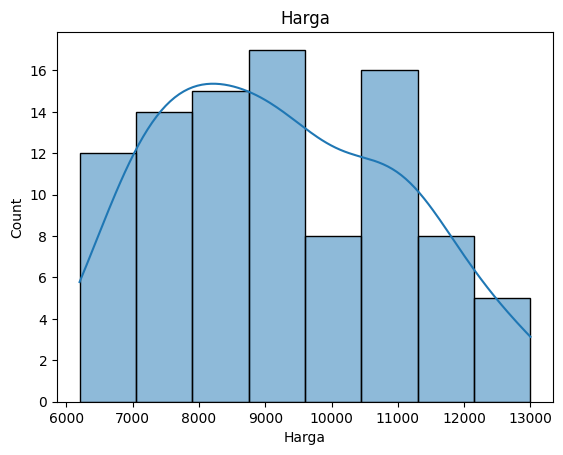

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Harga"], kde=True)
plt.title("Harga")
plt.show()

In [12]:
skew_val = df['Harga'].skew()
print(skew_val)

0.28943257774436654


<function matplotlib.pyplot.show(close=None, block=None)>

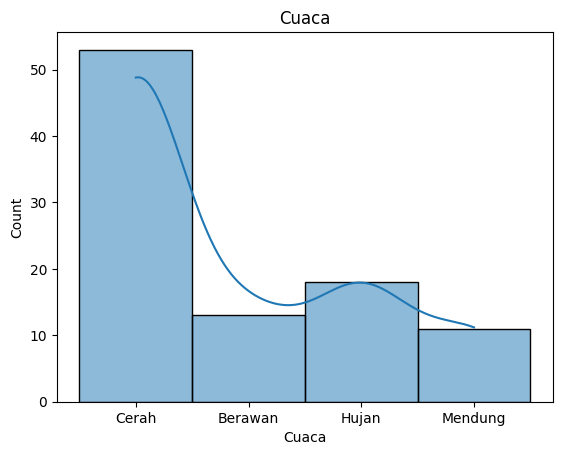

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Cuaca"], kde=True)
plt.title("Cuaca")
plt.show          

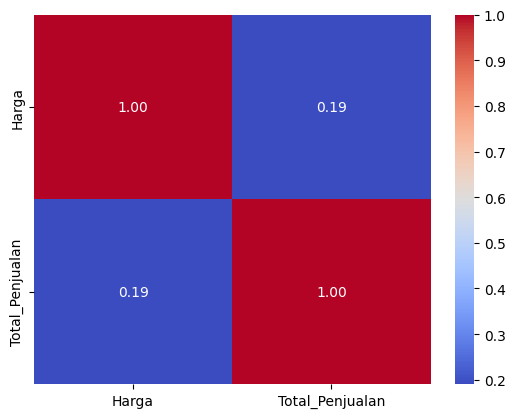

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_angka = df[["Harga", "Total_Penjualan"]]
corr = kolom_angka.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[['Harga', 'Hari', 'Promo', 'Cuaca']]
y = df["Total_Penjualan"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["Harga"]
categorical_columns = ["Hari","Cuaca","Promo"]

preprocessing = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns),
        ("cat", OneHotEncoder(), categorical_columns)
    ]
)

model = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LinearRegression())
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score :", r2_score(y_test, y_pred))
print("MAE Score :", mean_absolute_error(y_test, y_pred))
print("MSE Score :", mean_squared_error(y_test, y_pred))

R2 Score : 0.9064850021518649
MAE Score : 8.17094197677559
MSE Score : 108.13545900754994


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[['Harga', 'Hari', 'Cuaca', 'Promo']]
y = df['Total_Penjualan']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size=0.2, random_state=42
)


numeric_column = ["Harga"]
categorical_column = ["Hari","Cuaca","Promo"]


preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_column),
        ("Ohe", OneHotEncoder(), categorical_column)
    ]
)

model_forest = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model_forest", RandomForestRegressor())
    ]
)

model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)

print("R2 Score :", r2_score(y_test, y_pred))
print("MAE Score :", mean_absolute_error(y_test, y_pred))
print("MSE Score :", mean_squared_error(y_test, y_pred))

R2 Score : 0.9530000247635274
MAE Score : 5.313390977443604
MSE Score : 54.34811540917764


In [27]:
data_baru = pd.DataFrame([[6000, "Senin", "Mendung", "Ya"]], columns=["Harga", "Hari", "Cuaca", "Promo"])
prediksi = model.predict(data_baru)[0]
print(f"Model memprediksi total penjualan tomat {prediksi}")

Model memprediksi total penjualan tomat 103.80557513935646
